# Introduction
The data was extracted from the census bureau database found at https://www.census.gov/data.html

### Objective
The main goal is to predict whether a person income level over 50K a year or not.

# Data Acquisition

In [1]:
# Import Package and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch   # Used for reordering the correlation matrix

import sklearn 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#define path of data folder
data_path = 'D:/JOB PREP/Upcoming/Assessment - DS - Dataiku/Data/'
income_learn_df = pd.read_csv(data_path+"census_income_learn_label.csv")
income_test_df = pd.read_csv(data_path+"census_income_test_label.csv")

In [3]:
# instance weight should be ignore (as mentioned in metadata description file). Therefore, drop MARSUPWT feature from data
income_learn_df = income_learn_df.drop(['MARSUPWT'],axis=1)
income_test_df = income_test_df.drop(['MARSUPWT'],axis=1)

In [4]:
#sample data
income_learn_df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
income_test_df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [6]:
# Shape of dataset

In [7]:
income_learn_df.shape

(199523, 41)

In [8]:
income_test_df.shape

(99762, 41)

In [9]:
#featureset
income_learn_df.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'year', 'income_level'],
      dtype='object')

In [10]:
# Dataset Information 
income_learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AAGE          199523 non-null  int64 
 1   ACLSWKR       199523 non-null  object
 2   ADTIND        199523 non-null  int64 
 3   ADTOCC        199523 non-null  int64 
 4   AHGA          199523 non-null  object
 5   AHRSPAY       199523 non-null  int64 
 6   AHSCOL        199523 non-null  object
 7   AMARITL       199523 non-null  object
 8   AMJIND        199523 non-null  object
 9   AMJOCC        199523 non-null  object
 10  ARACE         199523 non-null  object
 11  AREORGN       199523 non-null  object
 12  ASEX          199523 non-null  object
 13  AUNMEM        199523 non-null  object
 14  AUNTYPE       199523 non-null  object
 15  AWKSTAT       199523 non-null  object
 16  CAPGAIN       199523 non-null  int64 
 17  CAPLOSS       199523 non-null  int64 
 18  DIVVAL        199523 non

# Data Exploration

### Descriptive Analysis 


In [11]:
# for Continuous features
income_learn_df.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [12]:
# Get all numeric columns
numeric_columns = list(income_learn_df.select_dtypes(include=[np.number]).columns)

#function to calculate interquartile range
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

numeric_df = income_learn_df[numeric_columns]

#calculate Median,Mode,Distinct, IQR for all columns
print(pd.concat([numeric_df.median(),numeric_df.mode().iloc[0],numeric_df.nunique(),numeric_df.apply(find_iqr),numeric_df.sum()], axis=1, keys=['Median', 'Mode','Distinct','IQR','Sum']))

         Median  Mode  Distinct   IQR       Sum
AAGE       33.0    34        91  35.0   6882386
ADTIND      0.0     0        52  33.0   3063141
ADTOCC      0.0     0        47  26.0   2255918
AHRSPAY     0.0     0      1240   0.0  11058943
CAPGAIN     0.0     0       132   0.0  86736437
CAPLOSS     0.0     0       113   0.0   7444959
DIVVAL      0.0     0      1478   0.0  39411685
NOEMP       1.0     0         7   4.0    390303
SEOTR       0.0     0         3   0.0     35004
VETYN       2.0     2         3   0.0    302244
WKSWORK     8.0     0        53  52.0   4623925
year       94.0    94         2   1.0  18854858


In [13]:
#Explore Top values from Features
def find_top_values(x):
    print(x.value_counts(normalize=True).head(),'\n')
print(numeric_df.apply(find_top_values))

34    0.017487
35    0.017291
36    0.016805
31    0.016795
33    0.016740
Name: AAGE, dtype: float64 

0     0.504624
33    0.085554
43    0.041514
4     0.029992
42    0.023471
Name: ADTIND, dtype: float64 

0     0.504624
2     0.043885
26    0.039529
19    0.027130
29    0.025586
Name: ADTOCC, dtype: float64 

0      0.943345
500    0.003679
600    0.002737
700    0.002676
800    0.002541
Name: AHRSPAY, dtype: float64 

0        0.963017
15024    0.003949
7688     0.003052
7298     0.002917
99999    0.001955
Name: CAPGAIN, dtype: float64 

0       0.980423
1902    0.002040
1977    0.001910
1887    0.001824
1602    0.000967
Name: CAPLOSS, dtype: float64 

0       0.894042
100     0.005754
500     0.005162
1000    0.004481
200     0.004340
Name: DIVVAL, dtype: float64 

0    0.481062
6    0.182991
1    0.115821
4    0.072067
3    0.067285
Name: NOEMP, dtype: float64 

0    0.905520
2    0.080958
1    0.013522
Name: SEOTR, dtype: float64 

2    0.752445
0    0.237612
1    0.009944
Nam

### Univariate Analysis

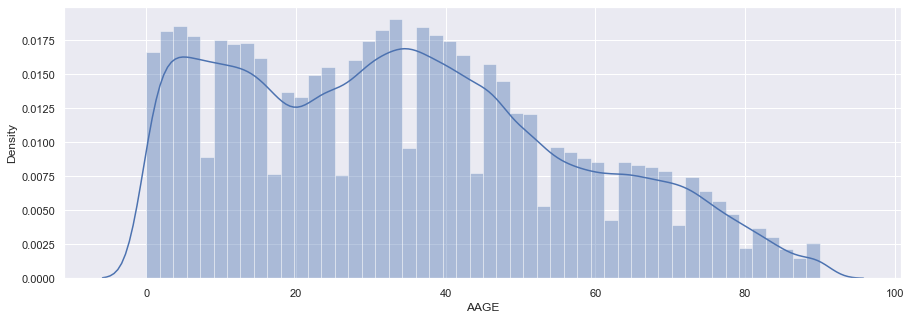

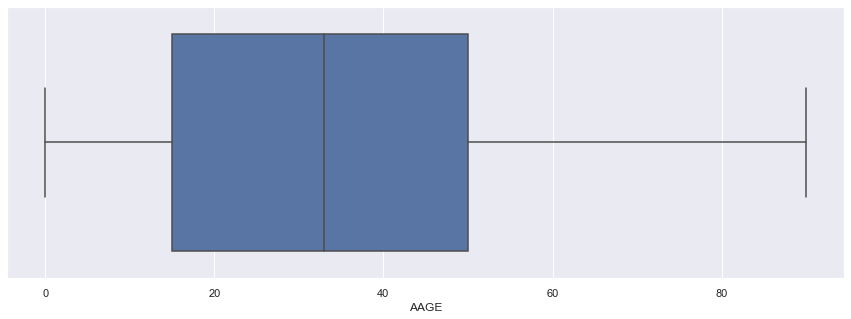

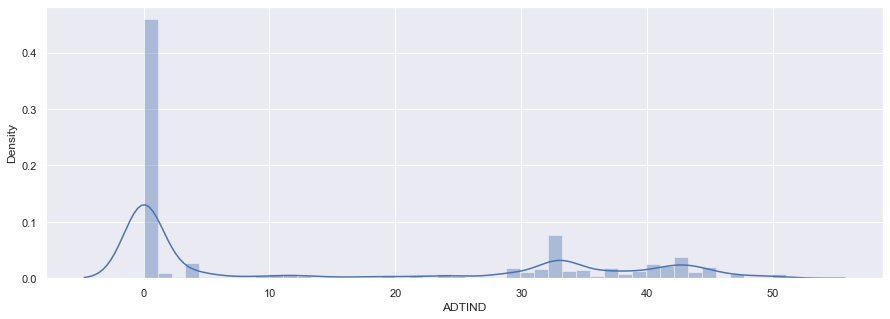

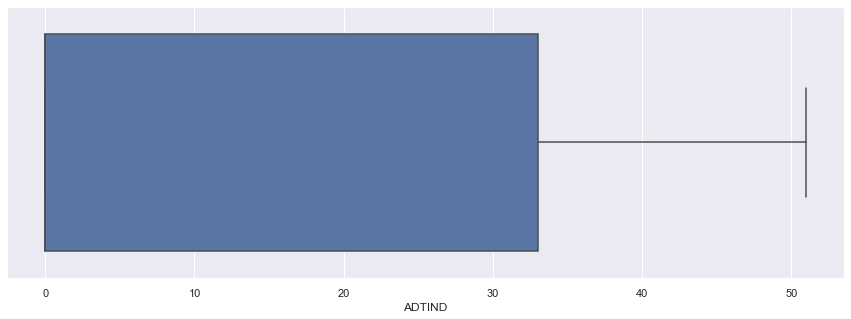

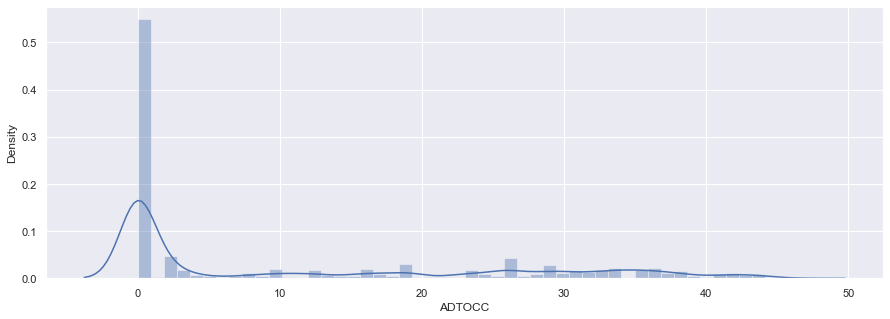

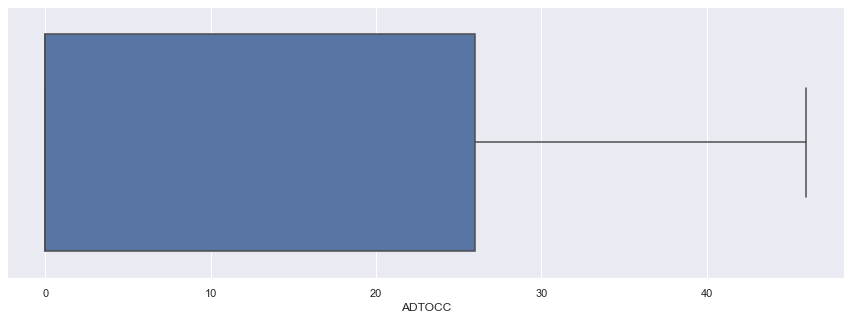

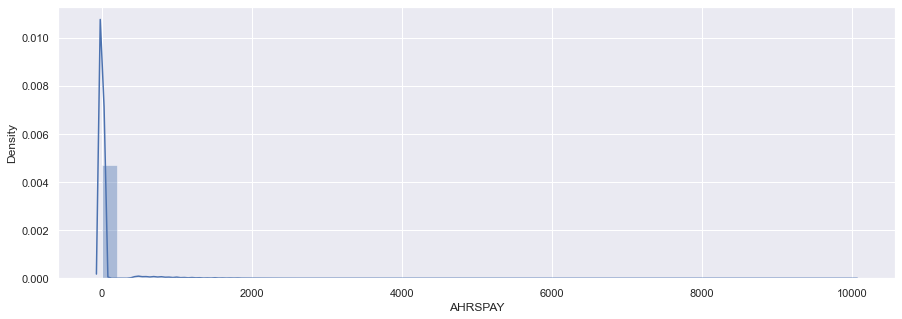

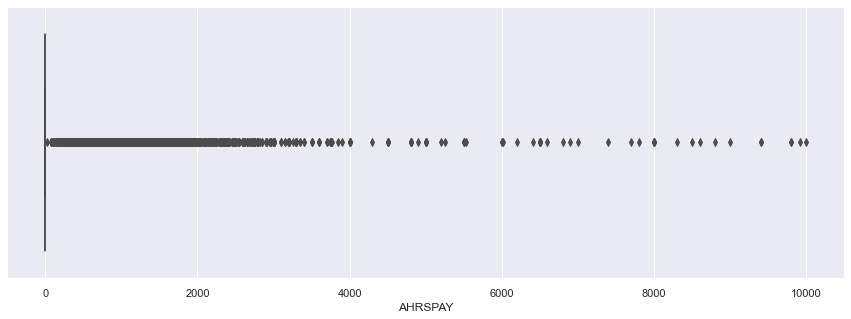

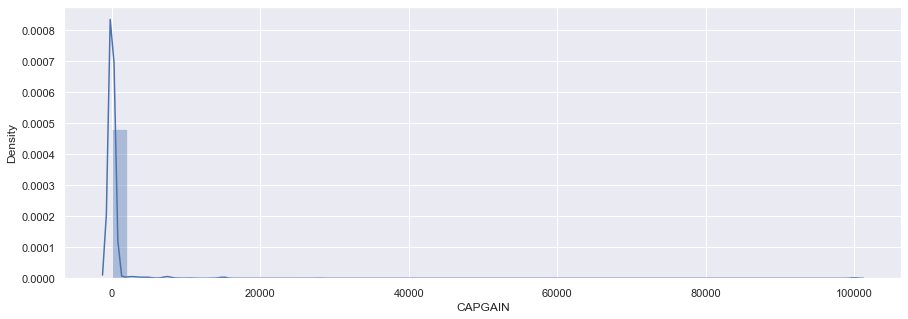

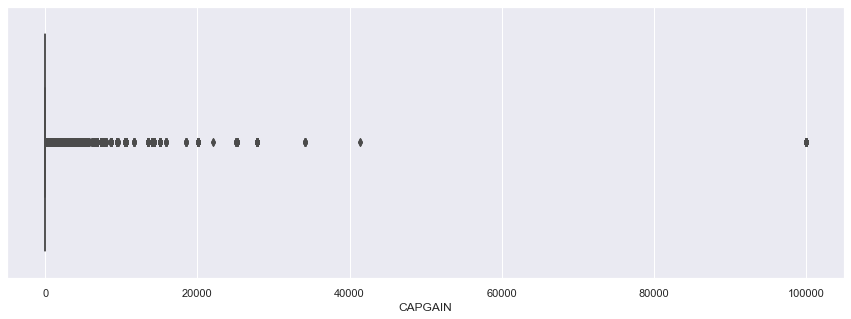

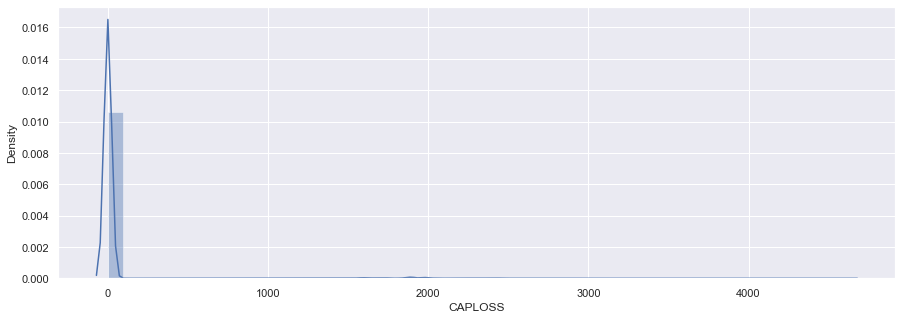

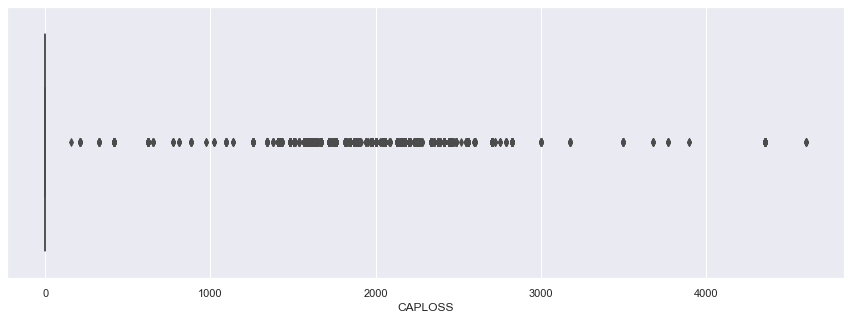

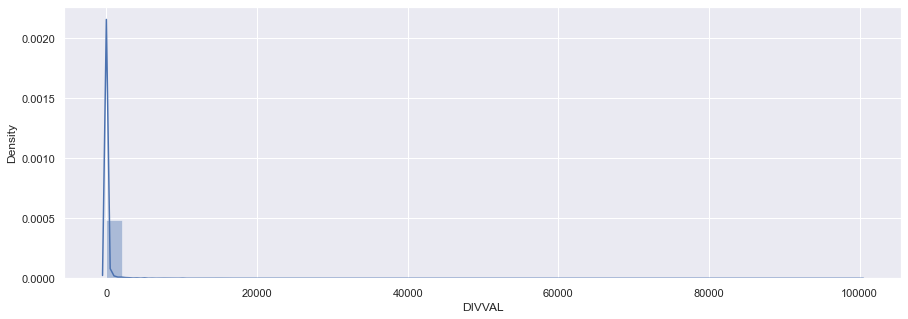

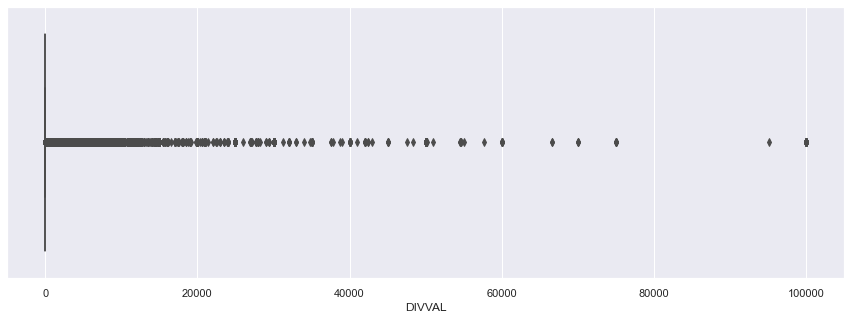

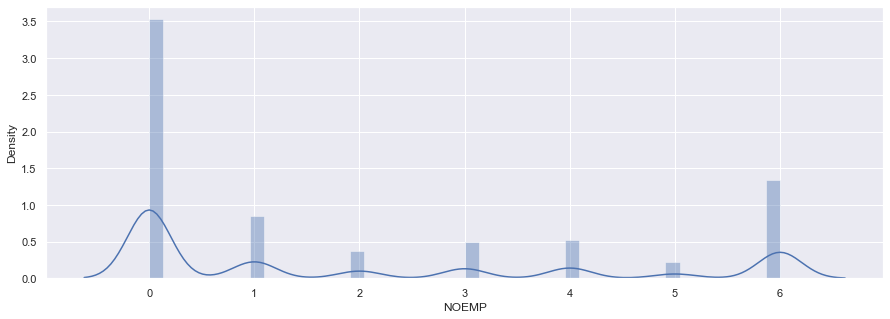

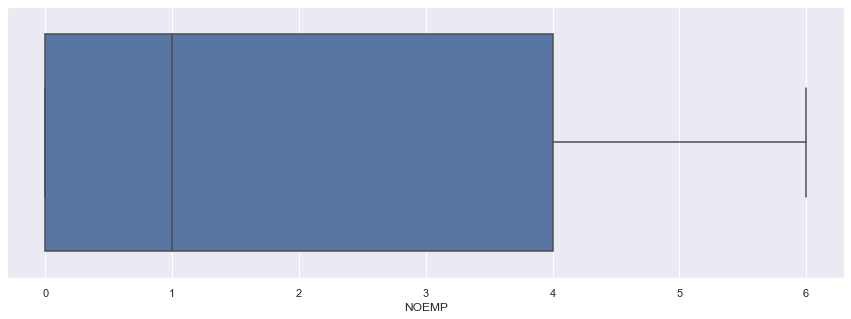

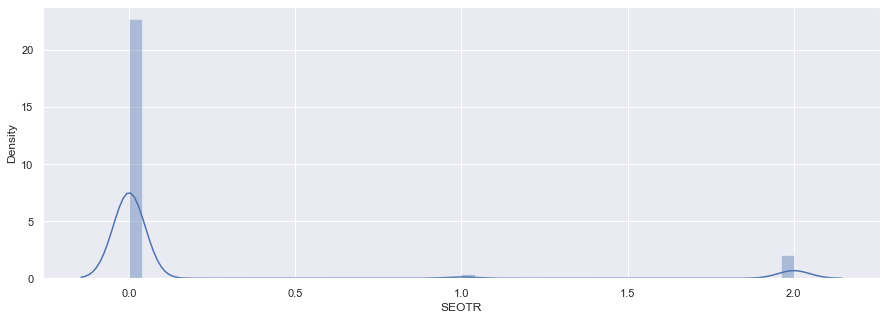

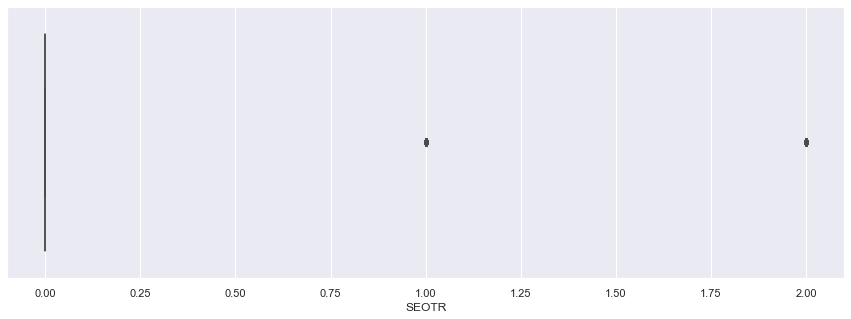

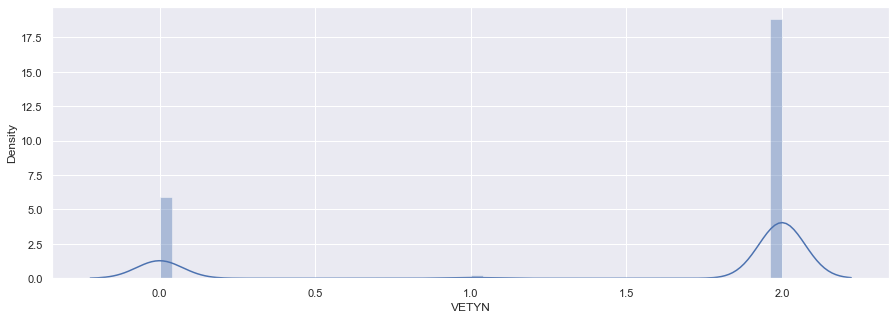

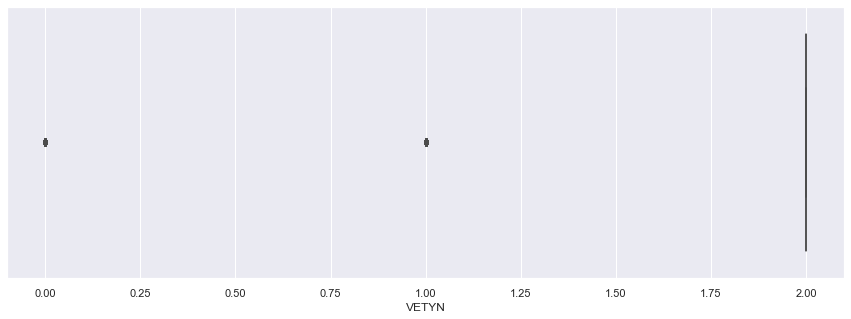

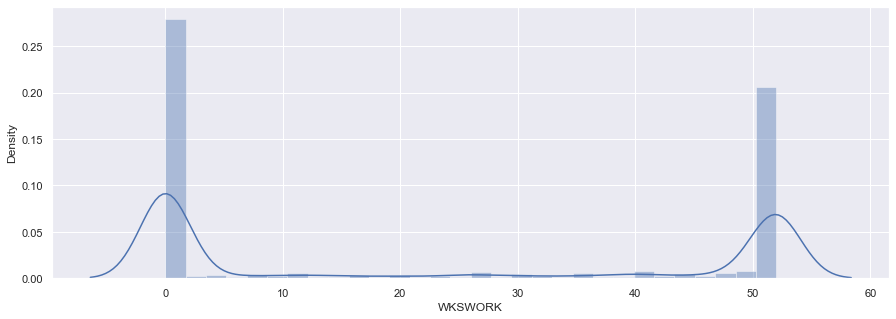

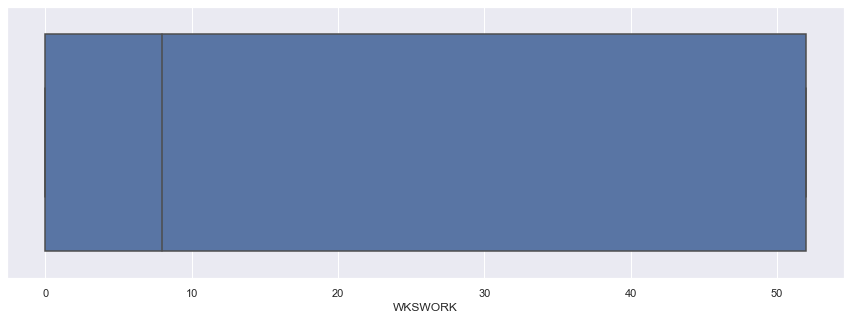

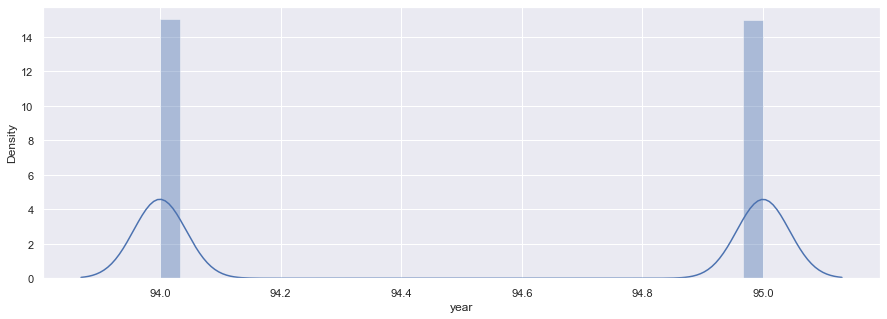

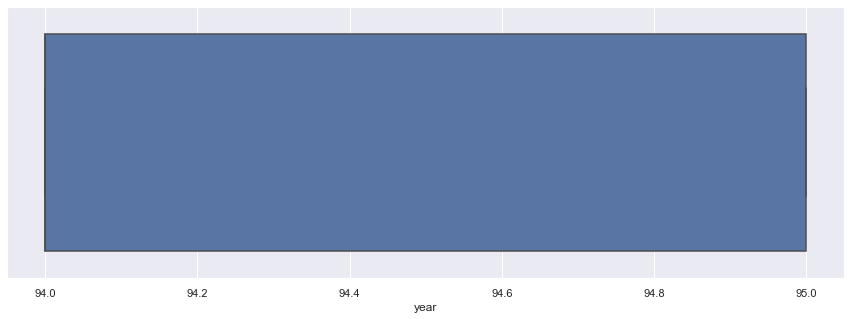

AAGE       None
ADTIND     None
ADTOCC     None
AHRSPAY    None
CAPGAIN    None
CAPLOSS    None
DIVVAL     None
NOEMP      None
SEOTR      None
VETYN      None
WKSWORK    None
year       None
dtype: object


In [14]:
#Plot histogram is a representation of the distribution of dataset.
sns.set(rc={'figure.figsize':(15,5)})

#Explore Top values from Features
def find_distribution(x):
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(x)
    plt.show()
    
    sns.boxplot(x)
    plt.show()
    
    
print(numeric_df.apply(find_distribution))



In [15]:
'''
Divide Person Age into Bins:

Values: 
00-79 = 0-79 years of age
80 = 80-84 years of age
85-90 = 85+ years of age

'''
income_learn_df['Age'] = pd.cut(income_learn_df['AAGE'], [0, 79, 84,90], labels=['0-79', '80-84', '85+'])
income_learn_df['Age'].value_counts()

0-79     191237
80-84      3214
85+        2233
Name: Age, dtype: int64

Summary:

- AAGE: This variable defines "age of the Person". The Data has records for all person including who is not born or dead, Data included age range from 0 to 90. Where, 191237 people belong to 0-79 age group, 3214 people belong to 80-84 age group and 2233 has more than 85 age. Age data has right tail skewness (positive-skew distributions). And no outliers and No missing records detected in data.


In [16]:
# for Continuous features
income_learn_df.describe(include=['O'])

,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,MIGMTR4,MIGSAME,MIGSUN,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,VETQVA,income_level
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


In [17]:
categorical_columns = list(income_learn_df.select_dtypes(include=[object]).columns)
categorical_df = income_learn_df[categorical_columns]

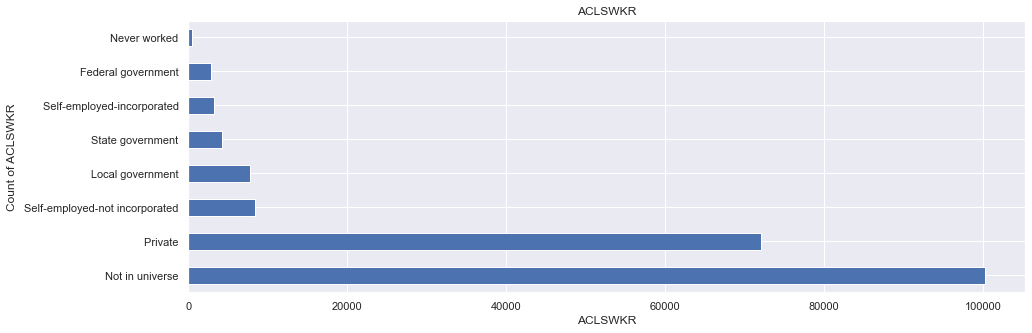

                                 counts         %
 Not in universe                 100245  0.502423
 Private                          72028  0.361001
 Self-employed-not incorporated    8445  0.042326
 Local government                  7784  0.039013
 State government                  4227  0.021186
 Self-employed-incorporated        3265  0.016364
 Federal government                2925  0.014660
 Never worked                       439  0.002200
 Without pay                        165  0.000827


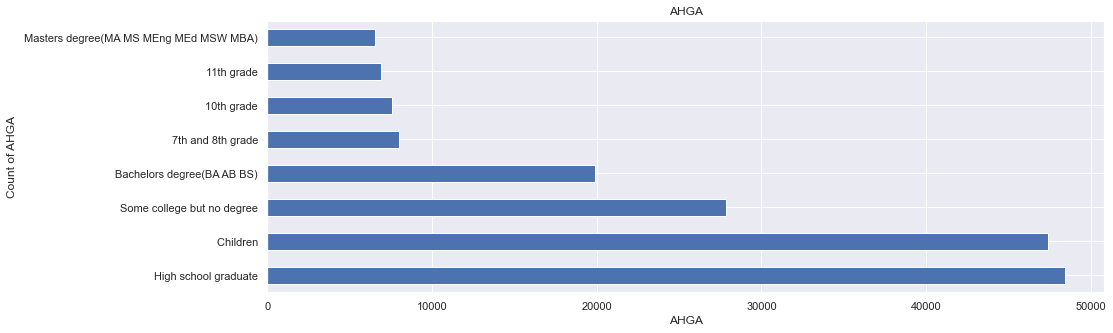

                                         counts         %
 High school graduate                     48407  0.242614
 Children                                 47422  0.237677
 Some college but no degree               27820  0.139433
 Bachelors degree(BA AB BS)               19865  0.099562
 7th and 8th grade                         8007  0.040131
 10th grade                                7557  0.037875
 11th grade                                6876  0.034462
 Masters degree(MA MS MEng MEd MSW MBA)    6541  0.032783
 9th grade                                 6230  0.031224
 Associates degree-occup /vocational       5358  0.026854
 Associates degree-academic program        4363  0.021867
 5th or 6th grade                          3277  0.016424
 12th grade no diploma                     2126  0.010655
 1st 2nd 3rd or 4th grade                  1799  0.009017
 Prof school degree (MD DDS DVM LLB JD)    1793  0.008986
 Doctorate degree(PhD EdD)                 1263  0.006330
 Less than 1st

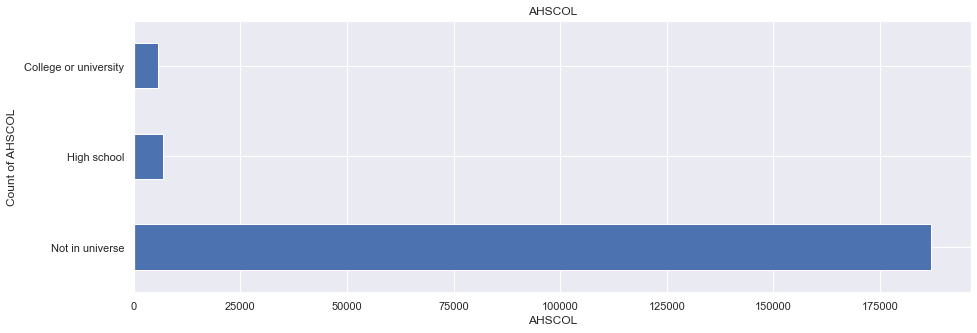

                        counts         %
 Not in universe        186943  0.936950
 High school              6892  0.034542
 College or university    5688  0.028508


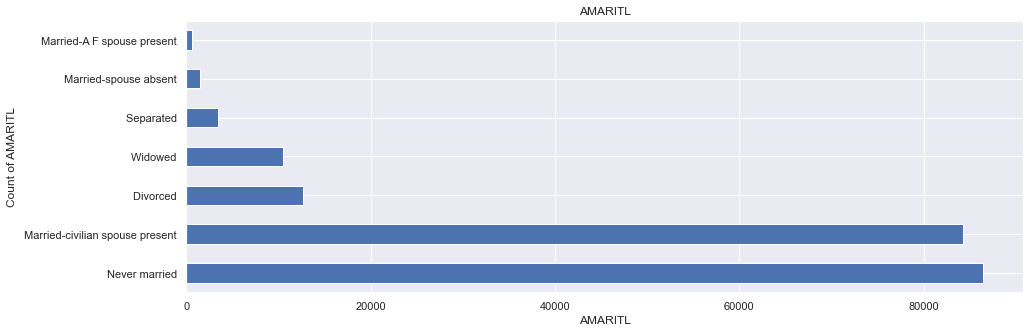

                                  counts         %
 Never married                     86485  0.433459
 Married-civilian spouse present   84222  0.422117
 Divorced                          12710  0.063702
 Widowed                           10463  0.052440
 Separated                          3460  0.017341
 Married-spouse absent              1518  0.007608
 Married-A F spouse present          665  0.003333


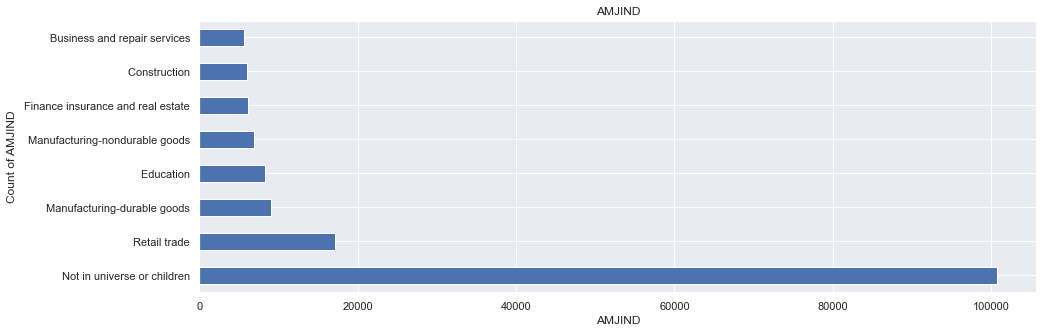

                                      counts         %
 Not in universe or children          100684  0.504624
 Retail trade                          17070  0.085554
 Manufacturing-durable goods            9015  0.045183
 Education                              8283  0.041514
 Manufacturing-nondurable goods         6897  0.034567
 Finance insurance and real estate      6145  0.030798
 Construction                           5984  0.029992
 Business and repair services           5651  0.028323
 Medical except hospital                4683  0.023471
 Public administration                  4610  0.023105
 Other professional services            4482  0.022464
 Transportation                         4209  0.021095
 Hospital services                      3964  0.019867
 Wholesale trade                        3596  0.018023
 Agriculture                            3023  0.015151
 Personal services except private HH    2937  0.014720
 Social services                        2549  0.012775
 Entertain

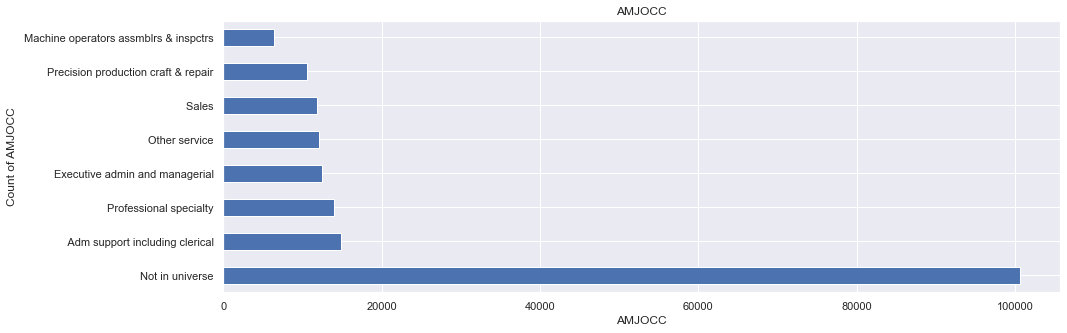

                                        counts         %
 Not in universe                        100684  0.504624
 Adm support including clerical          14837  0.074362
 Professional specialty                  13940  0.069867
 Executive admin and managerial          12495  0.062624
 Other service                           12099  0.060640
 Sales                                   11783  0.059056
 Precision production craft & repair     10518  0.052716
 Machine operators assmblrs & inspctrs    6379  0.031971
 Handlers equip cleaners etc              4127  0.020684
 Transportation and material moving       4020  0.020148
 Farming forestry and fishing             3146  0.015768
 Technicians and related support          3018  0.015126
 Protective services                      1661  0.008325
 Private household services                780  0.003909
 Armed Forces                               36  0.000180


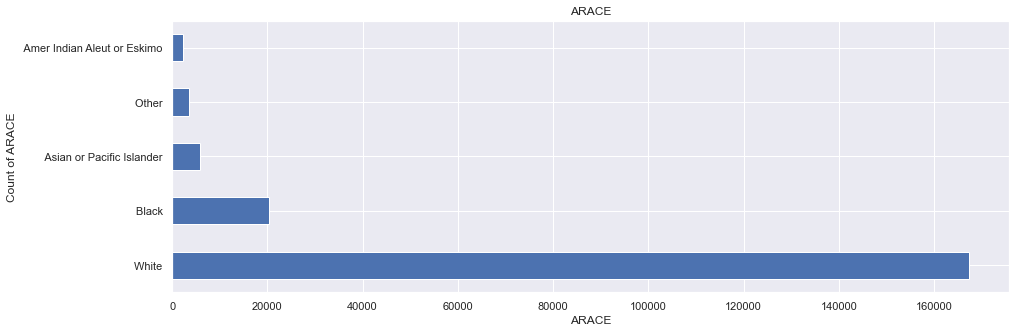

                              counts         %
 White                        167365  0.838826
 Black                         20415  0.102319
 Asian or Pacific Islander      5835  0.029245
 Other                          3657  0.018329
 Amer Indian Aleut or Eskimo    2251  0.011282


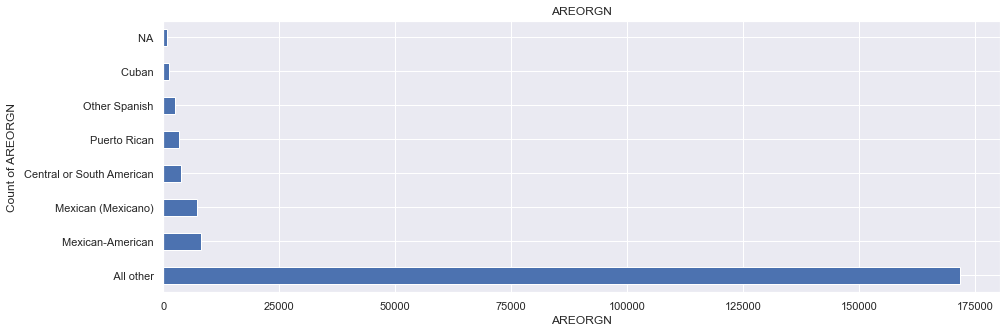

                            counts         %
 All other                  171907  0.861590
 Mexican-American             8079  0.040492
 Mexican (Mexicano)           7234  0.036256
 Central or South American    3895  0.019522
 Puerto Rican                 3313  0.016605
 Other Spanish                2485  0.012455
 Cuban                        1126  0.005643
 NA                            874  0.004380
 Do not know                   306  0.001534
 Chicano                       304  0.001524


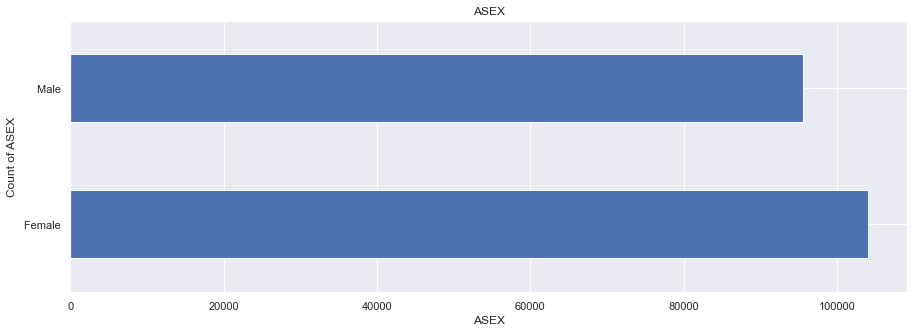

         counts         %
 Female  103984  0.521163
 Male     95539  0.478837


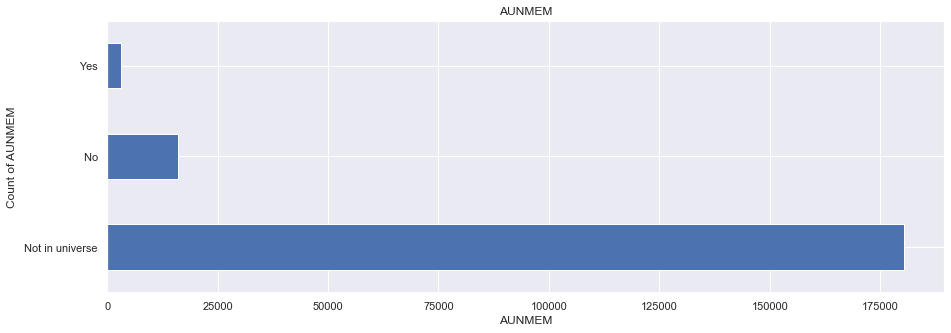

                  counts         %
 Not in universe  180459  0.904452
 No                16034  0.080362
 Yes                3030  0.015186


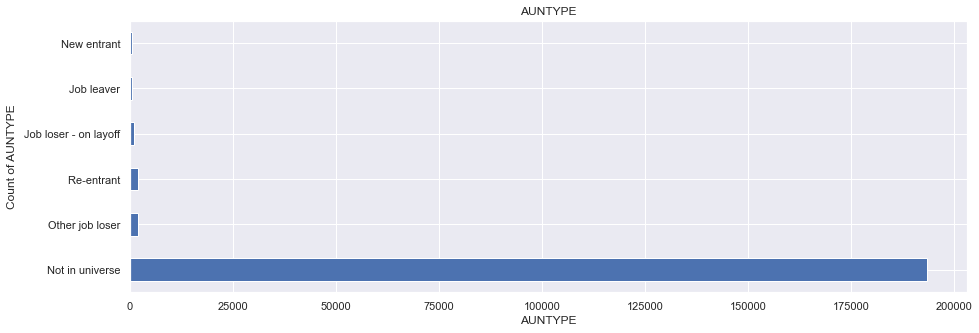

                        counts         %
 Not in universe        193453  0.969577
 Other job loser          2038  0.010214
 Re-entrant               2019  0.010119
 Job loser - on layoff     976  0.004892
 Job leaver                598  0.002997
 New entrant               439  0.002200


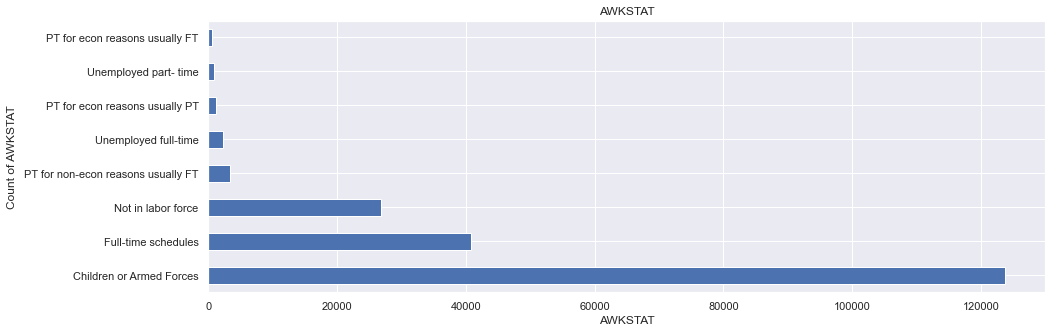

                                     counts         %
 Children or Armed Forces            123769  0.620324
 Full-time schedules                  40736  0.204167
 Not in labor force                   26808  0.134360
 PT for non-econ reasons usually FT    3322  0.016650
 Unemployed full-time                  2311  0.011583
 PT for econ reasons usually PT        1209  0.006059
 Unemployed part- time                  843  0.004225
 PT for econ reasons usually FT         525  0.002631


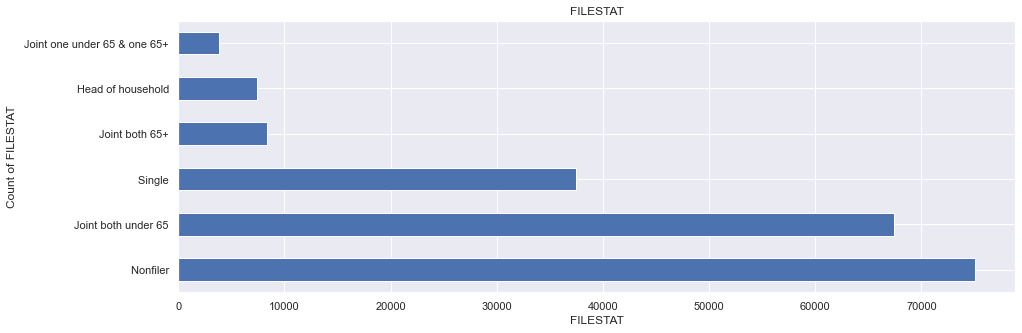

                               counts         %
 Nonfiler                       75094  0.376368
 Joint both under 65            67383  0.337720
 Single                         37421  0.187552
 Joint both 65+                  8332  0.041760
 Head of household               7426  0.037219
 Joint one under 65 & one 65+    3867  0.019381


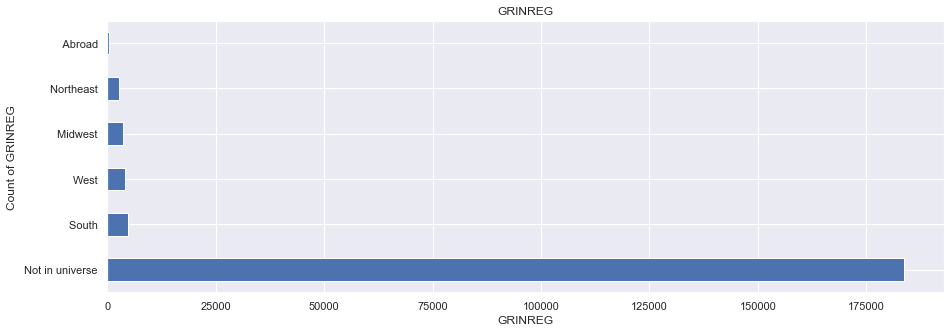

                  counts         %
 Not in universe  183750  0.920946
 South              4889  0.024503
 West               4074  0.020419
 Midwest            3575  0.017918
 Northeast          2705  0.013557
 Abroad              530  0.002656


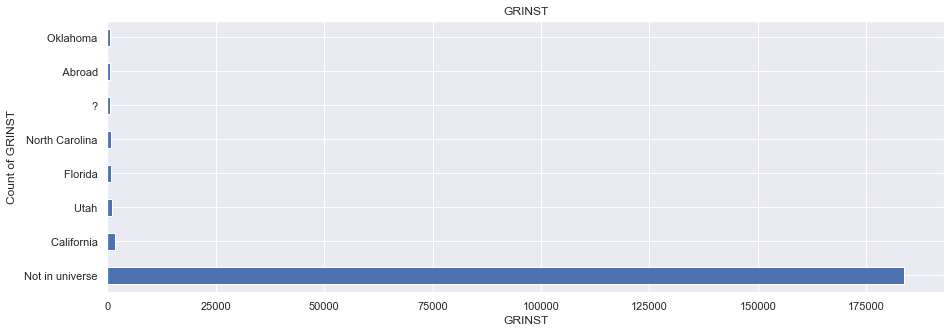

                       counts         %
 Not in universe       183750  0.920946
 California              1714  0.008590
 Utah                    1063  0.005328
 Florida                  849  0.004255
 North Carolina           812  0.004070
 ?                        708  0.003548
 Abroad                   671  0.003363
 Oklahoma                 626  0.003137
 Minnesota                576  0.002887
 Indiana                  533  0.002671
 North Dakota             499  0.002501
 New Mexico               463  0.002321
 Michigan                 441  0.002210
 Alaska                   290  0.001453
 Kentucky                 244  0.001223
 Arizona                  243  0.001218
 New Hampshire            242  0.001213
 Wyoming                  241  0.001208
 Colorado                 239  0.001198
 Oregon                   236  0.001183
 West Virginia            231  0.001158
 Georgia                  227  0.001138
 Montana                  226  0.001133
 Alabama                  216  0.001083


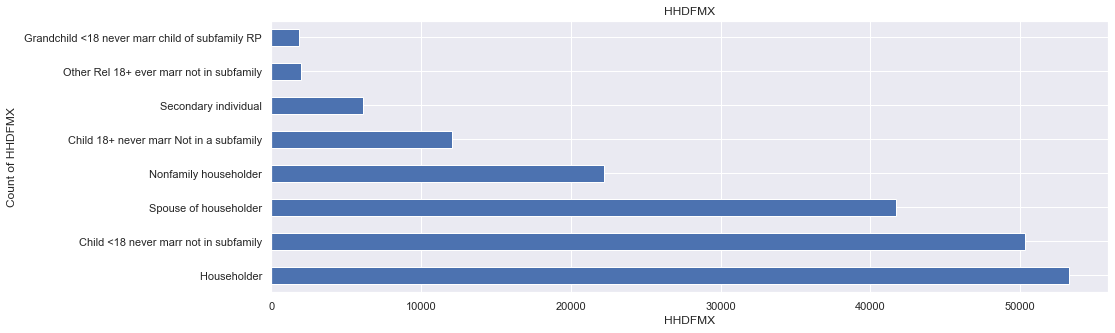

                                                  counts         %
 Householder                                       53248  0.266877
 Child <18 never marr not in subfamily             50326  0.252232
 Spouse of householder                             41695  0.208973
 Nonfamily householder                             22213  0.111331
 Child 18+ never marr Not in a subfamily           12030  0.060294
 Secondary individual                               6122  0.030683
 Other Rel 18+ ever marr not in subfamily           1956  0.009803
 Grandchild <18 never marr child of subfamily RP    1868  0.009362
 Other Rel 18+ never marr not in subfamily          1728  0.008661
 Grandchild <18 never marr not in subfamily         1066  0.005343
 Child 18+ ever marr Not in a subfamily             1013  0.005077
 Child under 18 of RP of unrel subfamily             732  0.003669
 RP of unrelated subfamily                           685  0.003433
 Child 18+ ever marr RP of subfamily                 671  0.00

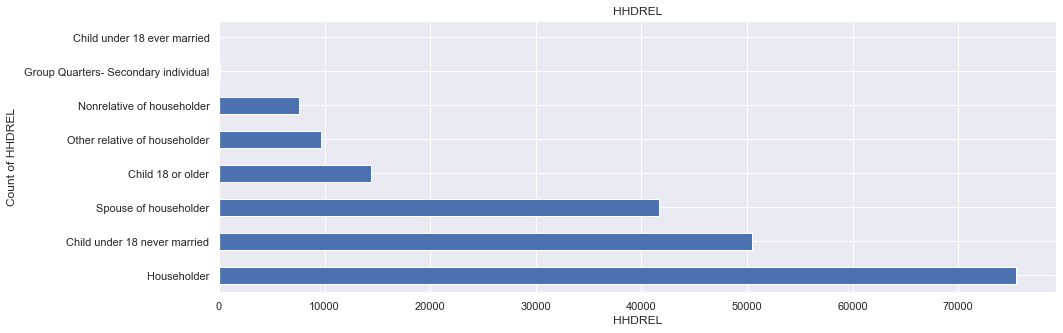

                                       counts         %
 Householder                            75475  0.378277
 Child under 18 never married           50426  0.252733
 Spouse of householder                  41709  0.209044
 Child 18 or older                      14430  0.072322
 Other relative of householder           9703  0.048631
 Nonrelative of householder              7601  0.038096
 Group Quarters- Secondary individual     132  0.000662
 Child under 18 ever married               47  0.000236


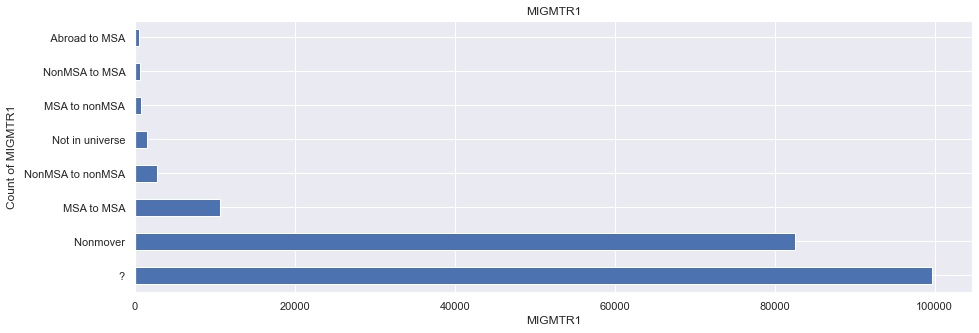

                   counts         %
 ?                  99696  0.499672
 Nonmover           82538  0.413677
 MSA to MSA         10601  0.053132
 NonMSA to nonMSA    2811  0.014089
 Not in universe     1516  0.007598
 MSA to nonMSA        790  0.003959
 NonMSA to MSA        615  0.003082
 Abroad to MSA        453  0.002270
 Not identifiable     430  0.002155
 Abroad to nonMSA      73  0.000366


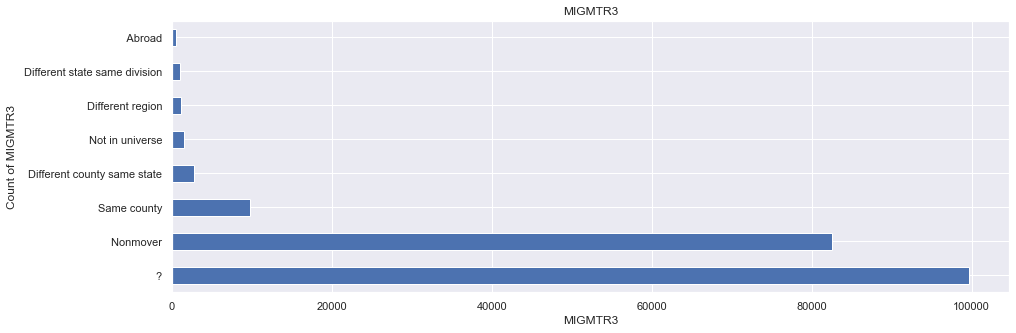

                                 counts         %
 ?                                99696  0.499672
 Nonmover                         82538  0.413677
 Same county                       9812  0.049177
 Different county same state       2797  0.014018
 Not in universe                   1516  0.007598
 Different region                  1178  0.005904
 Different state same division      991  0.004967
 Abroad                             530  0.002656
 Different division same region     465  0.002331


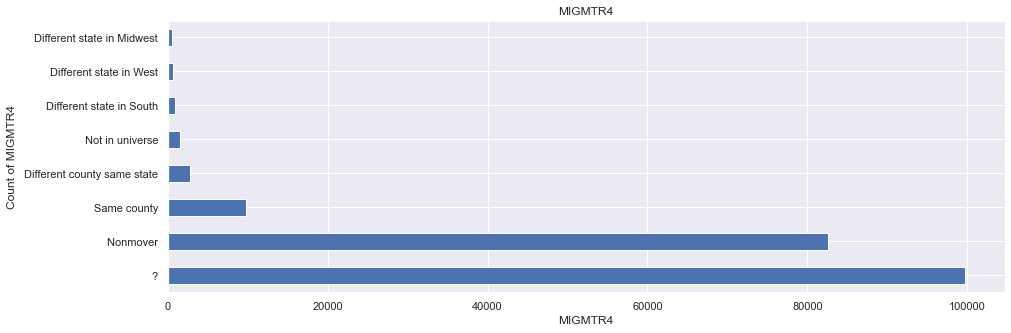

                               counts         %
 ?                              99696  0.499672
 Nonmover                       82538  0.413677
 Same county                     9812  0.049177
 Different county same state     2797  0.014018
 Not in universe                 1516  0.007598
 Different state in South         973  0.004877
 Different state in West          679  0.003403
 Different state in Midwest       551  0.002762
 Abroad                           530  0.002656
 Different state in Northeast     431  0.002160


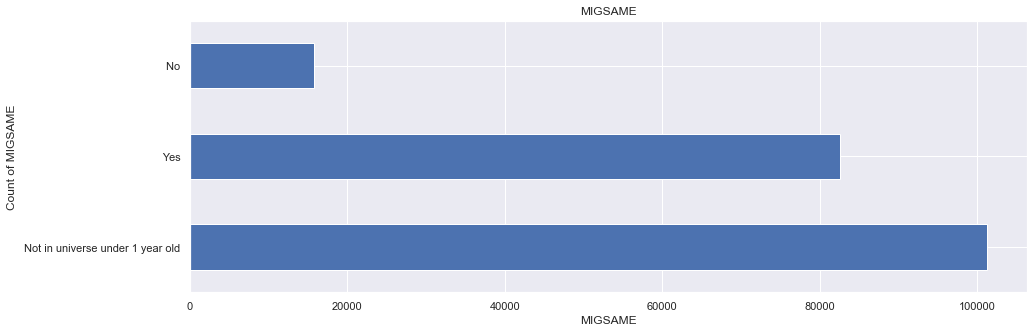

                                   counts         %
 Not in universe under 1 year old  101212  0.507270
 Yes                                82538  0.413677
 No                                 15773  0.079054


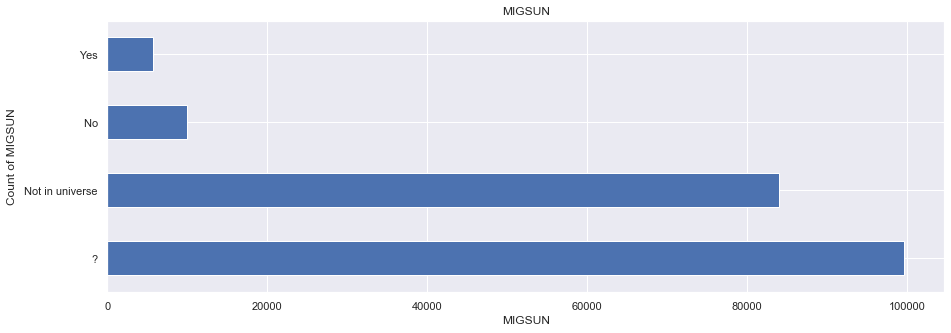

                  counts         %
 ?                 99696  0.499672
 Not in universe   84054  0.421275
 No                 9987  0.050054
 Yes                5786  0.028999


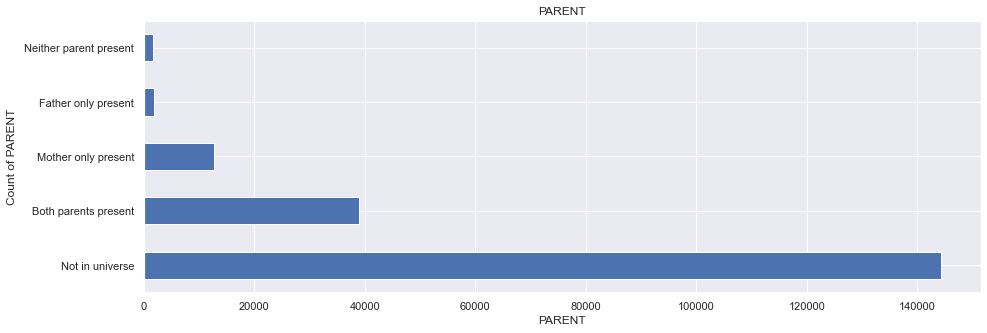

                         counts         %
 Not in universe         144232  0.722884
 Both parents present     38983  0.195381
 Mother only present      12772  0.064013
 Father only present       1883  0.009438
 Neither parent present    1653  0.008285


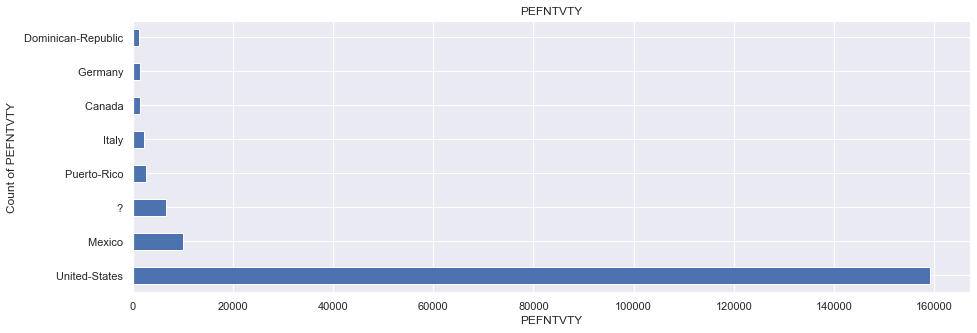

                               counts         %
 United-States                 159163  0.797718
 Mexico                         10008  0.050160
 ?                               6713  0.033645
 Puerto-Rico                     2680  0.013432
 Italy                           2212  0.011086
 Canada                          1380  0.006916
 Germany                         1356  0.006796
 Dominican-Republic              1290  0.006465
 Poland                          1212  0.006074
 Philippines                     1154  0.005784
 Cuba                            1125  0.005638
 El-Salvador                      982  0.004922
 China                            856  0.004290
 England                          793  0.003974
 Columbia                         614  0.003077
 India                            580  0.002907
 South Korea                      530  0.002656
 Ireland                          508  0.002546
 Jamaica                          463  0.002321
 Vietnam                          457  0

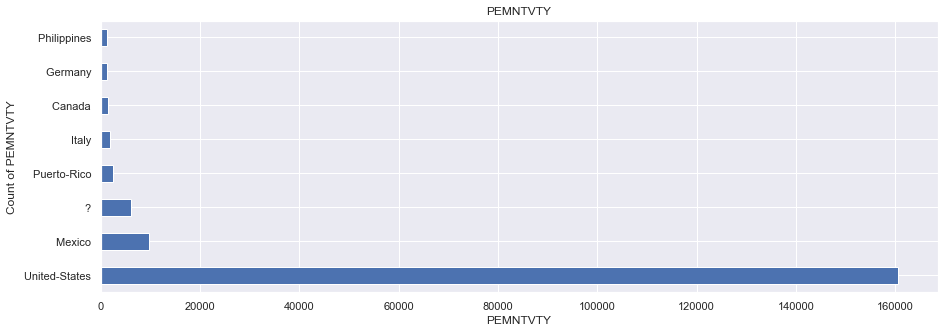

                               counts         %
 United-States                 160479  0.804313
 Mexico                          9781  0.049022
 ?                               6119  0.030668
 Puerto-Rico                     2473  0.012395
 Italy                           1844  0.009242
 Canada                          1451  0.007272
 Germany                         1382  0.006927
 Philippines                     1231  0.006170
 Poland                          1110  0.005563
 El-Salvador                     1108  0.005553
 Cuba                            1108  0.005553
 Dominican-Republic              1103  0.005528
 England                          903  0.004526
 China                            760  0.003809
 Columbia                         612  0.003067
 South Korea                      609  0.003052
 Ireland                          599  0.003002
 India                            581  0.002912
 Vietnam                          473  0.002371
 Japan                            469  0

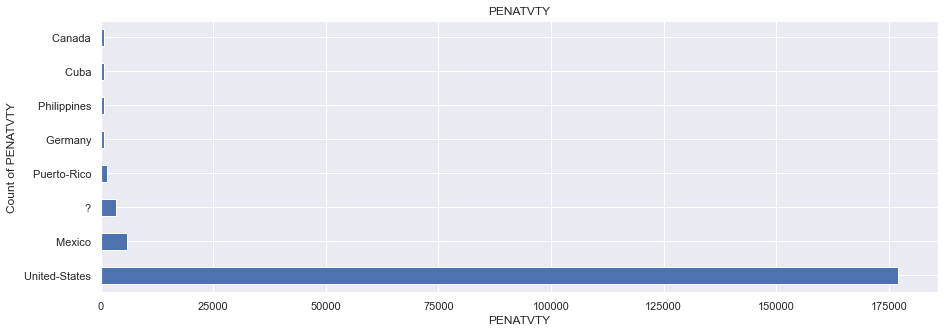

                               counts         %
 United-States                 176989  0.887061
 Mexico                          5767  0.028904
 ?                               3393  0.017006
 Puerto-Rico                     1400  0.007017
 Germany                          851  0.004265
 Philippines                      845  0.004235
 Cuba                             837  0.004195
 Canada                           700  0.003508
 Dominican-Republic               690  0.003458
 El-Salvador                      689  0.003453
 China                            478  0.002396
 South Korea                      471  0.002361
 England                          457  0.002290
 Columbia                         434  0.002175
 Italy                            419  0.002100
 India                            408  0.002045
 Vietnam                          391  0.001960
 Poland                           381  0.001910
 Guatemala                        344  0.001724
 Japan                            339  0

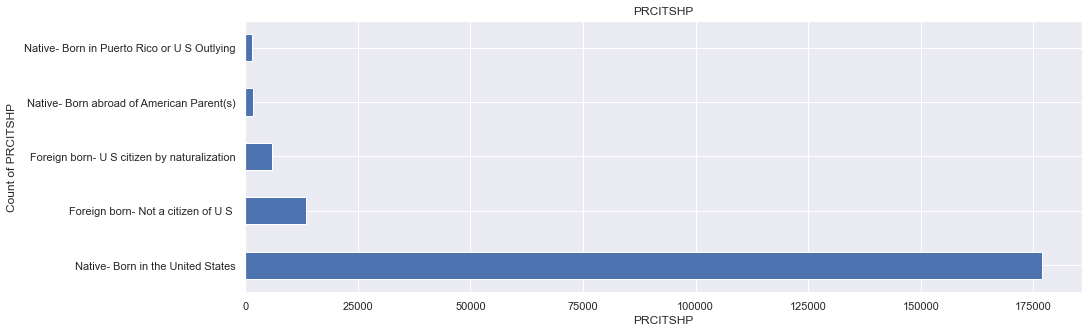

                                              counts         %
 Native- Born in the United States            176992  0.887076
 Foreign born- Not a citizen of U S            13401  0.067165
 Foreign born- U S citizen by naturalization    5855  0.029345
 Native- Born abroad of American Parent(s)      1756  0.008801
 Native- Born in Puerto Rico or U S Outlying    1519  0.007613


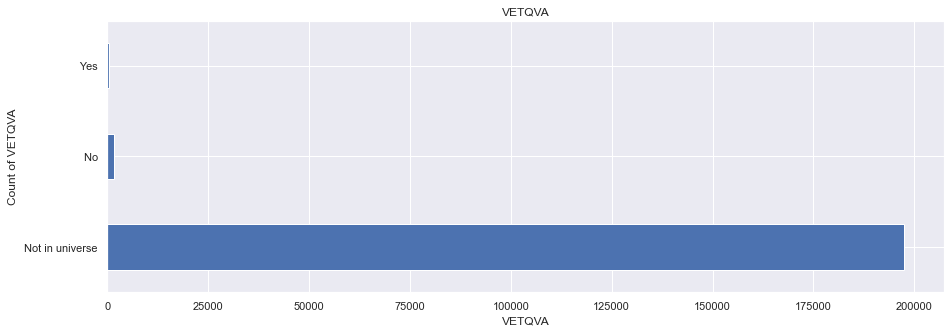

                  counts         %
 Not in universe  197539  0.990056
 No                 1593  0.007984
 Yes                 391  0.001960


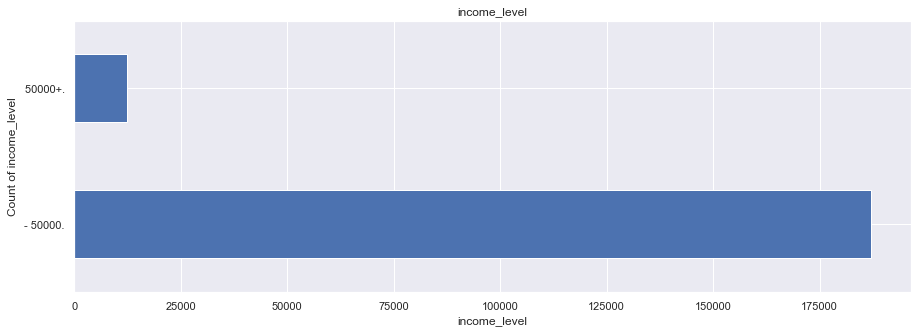

           counts         %
 - 50000.  187141  0.937942
 50000+.    12382  0.062058


ACLSWKR         
AHGA            
AHSCOL          
AMARITL         
AMJIND          
AMJOCC          
ARACE           
AREORGN         
ASEX            
AUNMEM          
AUNTYPE         
AWKSTAT         
FILESTAT        
GRINREG         
GRINST          
HHDFMX          
HHDREL          
MIGMTR1         
MIGMTR3         
MIGMTR4         
MIGSAME         
MIGSUN          
PARENT          
PEFNTVTY        
PEMNTVTY        
PENATVTY        
PRCITSHP        
VETQVA          
income_level    
dtype: object

In [18]:
def cat_analysis(x):
    count =x.value_counts()
    
    ax = count.head(8).plot(kind='barh', title=x.name)
    ax.set_xlabel(x.name)
    ax.set_ylabel("Count of "+str(x.name))
    plt.show()

    percent = x.value_counts( normalize=True)
    print(pd.concat([count,percent], axis=1, keys=['counts', '%']))
    
    return ''
    
categorical_df.apply(cat_analysis)

<Figure size 1440x360 with 0 Axes>

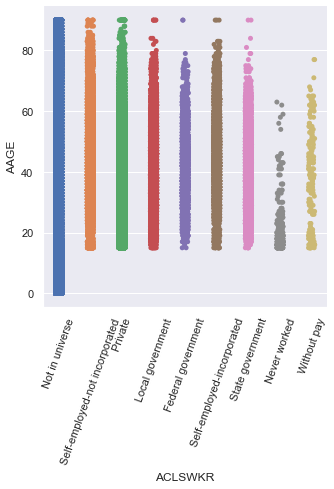

In [19]:
# Start age for working according to class
plt.figure(figsize=(20,5))
sns.catplot(data=income_learn_df[['AAGE','ACLSWKR']], x="ACLSWKR", y="AAGE")
plt.xticks(rotation=70)
plt.show()

In [20]:
# How many Workers class are living in the world
data_for_died_or_non_born = income_learn_df[income_learn_df['ACLSWKR'].str.strip()=='Not in universe']
data_for_alive_people = income_learn_df[income_learn_df['ACLSWKR'].str.strip()!='Not in universe']
print('Number of people who is died or non born:', data_for_died_or_non_born.shape[0])
print('Number of people who is living in the world:', data_for_alive_people.shape[0])

Number of people who is died or non born: 100245
Number of people who is living in the world: 99278


In [21]:
#Covert income_level to binary numeric form
income_learn_df['income_level'] = income_learn_df['income_level'].str.strip()
income_learn_df['income_more_than_50K'] = np.where(income_learn_df['income_level'].isin(['50000+.']), 1, 0)

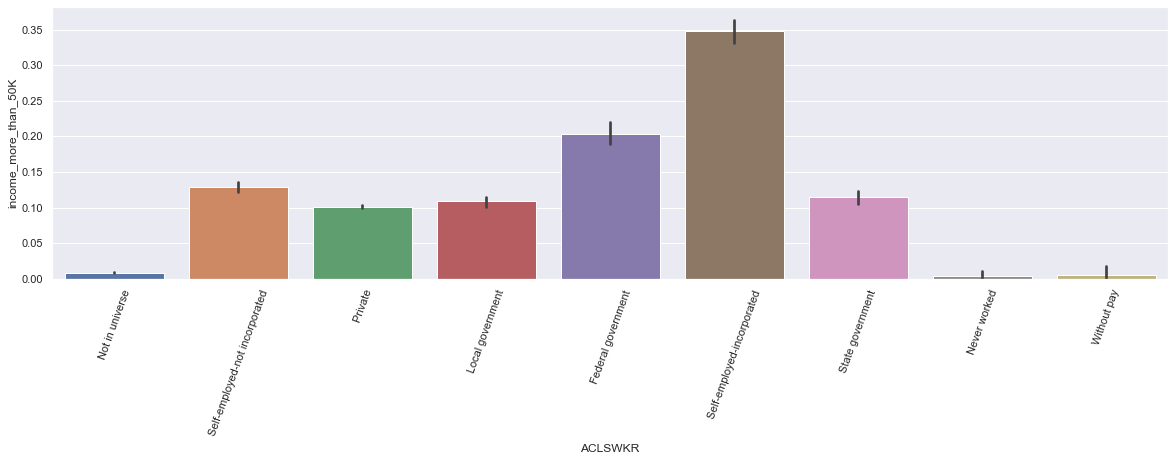

In [22]:
# Impact of workers class on Income level
plt.figure(figsize=(20,5))
sns.barplot(data=income_learn_df[['income_more_than_50K','ACLSWKR']], x="ACLSWKR", y="income_more_than_50K")
plt.xticks(rotation=70)
plt.show()

<AxesSubplot:>

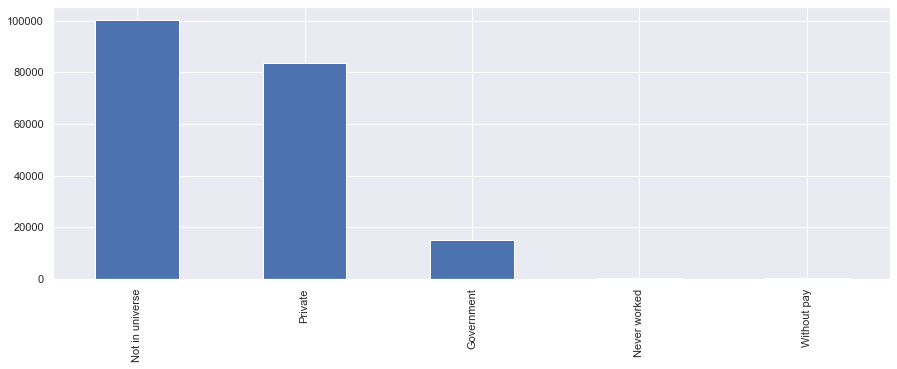

In [23]:
income_learn_df['ACLSWKR'] = income_learn_df['ACLSWKR'].str.strip()

WC_dict = {'Self-employed-not incorporated':'Private','Local government':'Government','State government':'Government',\
          'Self-employed-incorporated':'Private','Federal government':'Government'}
income_learn_df['WorkerClass'] = income_learn_df['ACLSWKR']
income_learn_df['WorkerClass'] = income_learn_df['WorkerClass'].replace(WC_dict)
income_learn_df['WorkerClass'].value_counts().plot(kind='bar')

- ACLSWKR: The data contains 9 types of class of worker with nominal data. This refers to the broad classification of the person's employer. these broad classifications for current jobs are Not in universe,Self-employed-not incorporated, Private, Local government,Federal government, Self-employed-incorporated, State government,Never worked,Without pay. Where, 98827 data records almost 50% of data belong to people who is "not in universe" and not contribute in income_level. Private and government workers has 98662 records and considered "wage and salary workers", which is 50% of the data.this includes private, Self-employed-not incorporated,Local government,State government,Self-employed-incorporated,Federal government,Without pay. On the other side, 165 workers only works without any pay and 438 people doesnot work. All Workers has more than 15 age expect "Not in universe". Therefore, Working minimum age is 15. The Highest Percentage of workers earns more than 50K belong to "Self-employed-incorporated". As compare to Government Jobs people prefer to the Private Jobs, Because people earns high pay in Private Jobs.


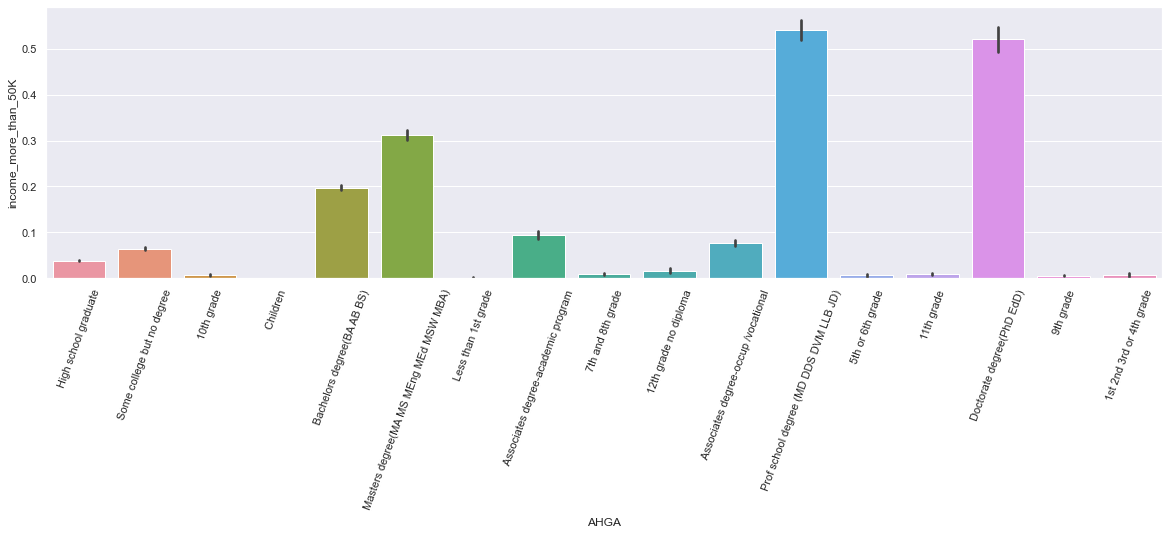

In [24]:
# Impact of education level on income level
plt.figure(figsize=(20,5))
sns.barplot(data=income_learn_df[['income_more_than_50K','AHGA']], x="AHGA", y="income_more_than_50K")
plt.xticks(rotation=70)
plt.show()

In [25]:
income_learn_df['AHGA'] = income_learn_df['AHGA'].str.strip()

ED_list = ['Some college but no degree','7th and 8th grade','10th grade','11th grade','9th grade','5th or 6th grade',\
          '12th grade no diploma','1st 2nd 3rd or 4th grade','Less than 1st grade']
income_learn_df['Education'] = income_learn_df['AHGA']
income_learn_df['Education'] = np.where(income_learn_df['AHGA'].isin(ED_list), 'Dropout', income_learn_df['AHGA'])
income_learn_df['Education'].value_counts()

Dropout                                   64511
High school graduate                      48407
Children                                  47422
Bachelors degree(BA AB BS)                19865
Masters degree(MA MS MEng MEd MSW MBA)     6541
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Name: Education, dtype: int64

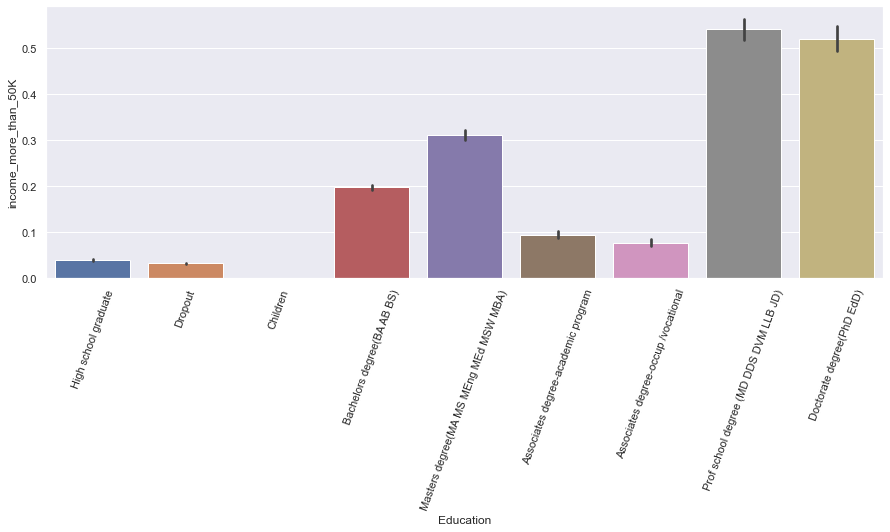

In [26]:
sns.barplot(data=income_learn_df[['income_more_than_50K','Education']], x="Education", y="income_more_than_50K")
plt.xticks(rotation=70)
plt.show()

In [27]:
#Identify Spouse Status
income_learn_df['AMARITL'] = income_learn_df['AMARITL'].str.strip()

MS_list = ['Married-civilian spouse present','Married-A F spouse present']
income_learn_df['SpouseStatus'] = income_learn_df['AMARITL']
income_learn_df['SpouseStatus'] = np.where(income_learn_df['AMARITL'].isin(MS_list), 'spouse present', 'spouse absent')
income_learn_df['SpouseStatus'].value_counts()

spouse absent     114636
spouse present     84887
Name: SpouseStatus, dtype: int64

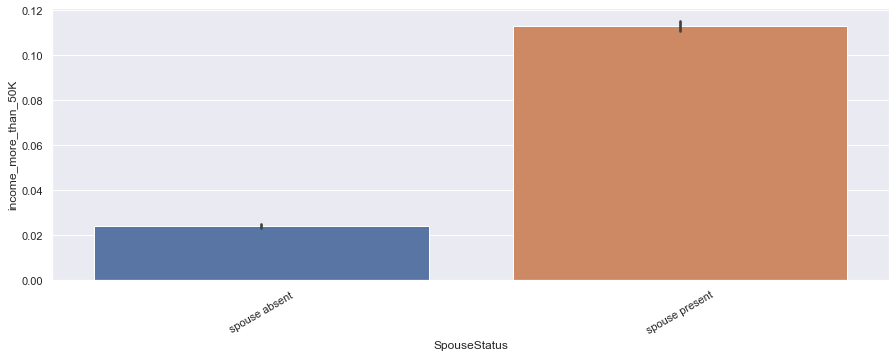

In [28]:
#Impact on income if Spouse is present
sns.barplot(data=income_learn_df[['income_more_than_50K','SpouseStatus']], x="SpouseStatus", y="income_more_than_50K")
plt.xticks(rotation=30)
plt.show()

- AMARITL: 7 distinct types of marital status people holds in data.The marital status classified in four major categories: single (never married), married, widowed, and divorced. The category "married" is further divided into "married, civilian spouse present," "married, Armed Forces spouse present," "married, spouse absent," "married, Armed Forces spouse absent," and "separated." A person is classified as "married, spouse present" if the husband or wife is reported as a member of the household even though he or she may be temporarily absent on business or on vacation, visiting, in a hospital, etc., at the time of the enumeration. Persons reported as "separated"included those with legal separations, those living apart with intentions of obtaining a divorce, and other persons permanently or temporarily estranged from their spouses because of marital discord.The almost 43% people has Married-civilian spouse present and almost same % of people are not married. Whereas, 1517 people spouse are absent.	As compare to Single Person More people earns 50K+ income if spouse is present.

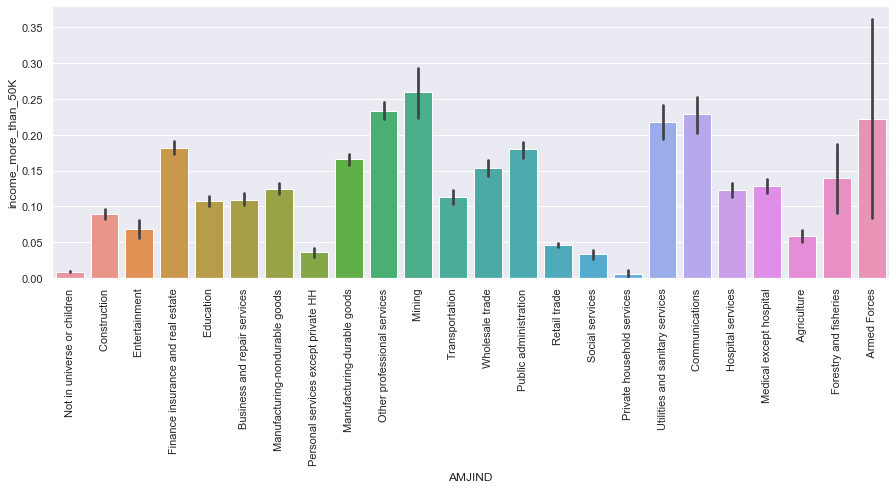

In [29]:
# Industry impact on income level
sns.barplot(data=income_learn_df[['income_more_than_50K','AMJIND']], x="AMJIND", y="income_more_than_50K")
plt.xticks(rotation=90)
plt.show()

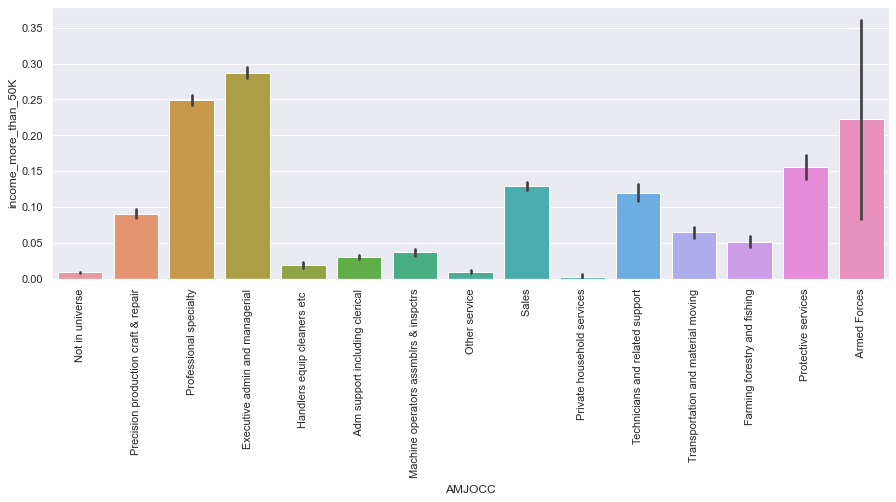

In [30]:
# occupation impact on income level
sns.barplot(data=income_learn_df[['income_more_than_50K','AMJOCC']], x="AMJOCC", y="income_more_than_50K")
plt.xticks(rotation=90)
plt.show()

- AMJIND: Data includes 24 distict major industry code to define primary industry. Where almost 50% people are not in universe or children. Mining industry has most employees who earns more than 50K and Private Household services pay rarely 50K+.
- AMJOCC: Data includes 15 distict major occupation code to define primary occupation. Where almost 50% people are not in universe. highest Percentage of workers earns more than 50K as a Executive admin and manager.

- There is 5 types of race includes White, Black, Asian or Pacific Islander, Amer Indian Aleut or Eskimo and Other race. The last category includes any other race except the four mentioned. 84% of white people live in USA and only 1% population belong to "Amer Indian Aleut or Eskimo"
- AREORGN: data has 10 different Hispanic Origin on the basis of questionnaire. As compare to identified Origin, unidentified origin people is high, which is 86% of population, This includes All other, Do not Know, NA. The least Origin is Chicano.

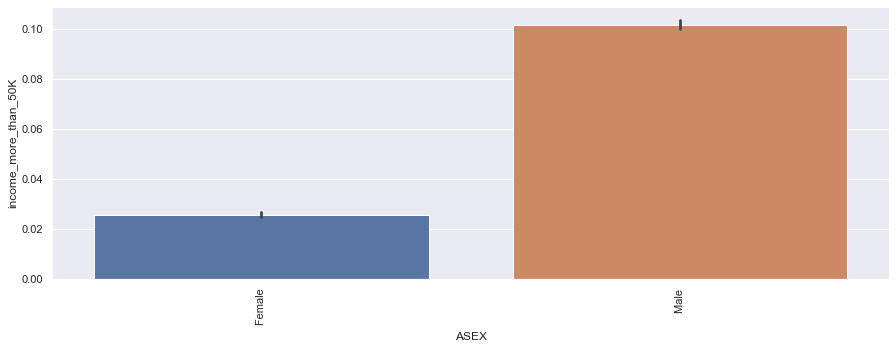

In [31]:
#Gender impact on income level
sns.barplot(data=income_learn_df[['income_more_than_50K','ASEX']], x="ASEX", y="income_more_than_50K")
plt.xticks(rotation=90)
plt.show()

The female population is high as compare to the male population.Howerver, More male workers earn 50K+ income.

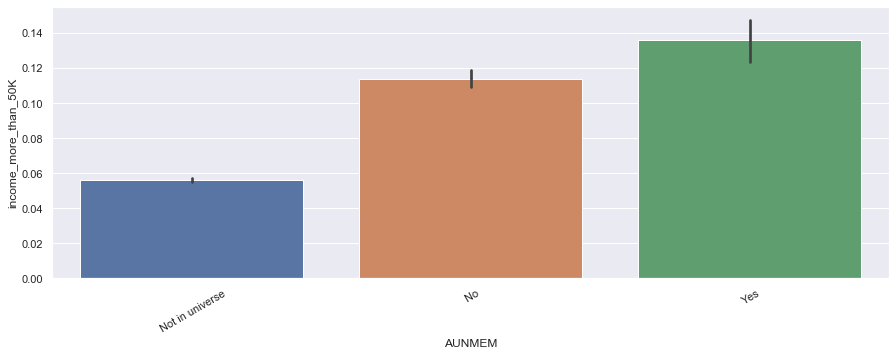

In [32]:
# impact of membership of a labor union on income level
sns.barplot(data=income_learn_df[['income_more_than_50K','AUNMEM']], x="AUNMEM", y="income_more_than_50K")
plt.xticks(rotation=30)
plt.show()

The membership of a labor union increases of chance to earn income more than 50K

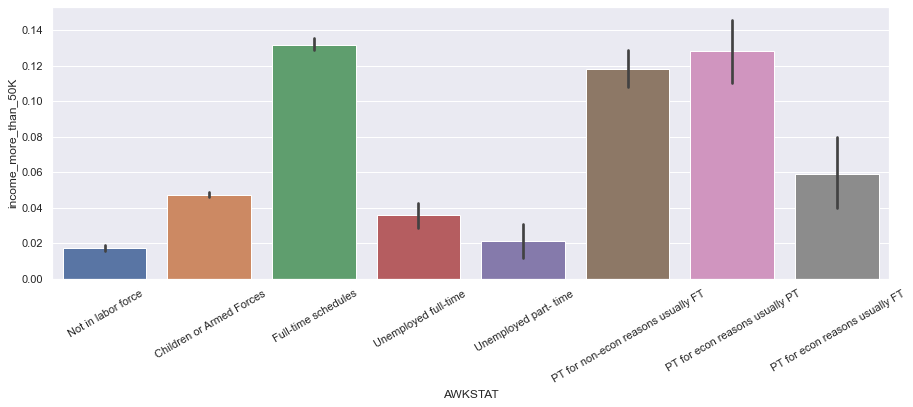

In [33]:
# impact of JobType on income level
sns.barplot(data=income_learn_df[['income_more_than_50K','AWKSTAT']], x="AWKSTAT", y="income_more_than_50K")
plt.xticks(rotation=30)
plt.show()

- People who has Full-time Scheduled Job they earns more than 50K+ as compare others.

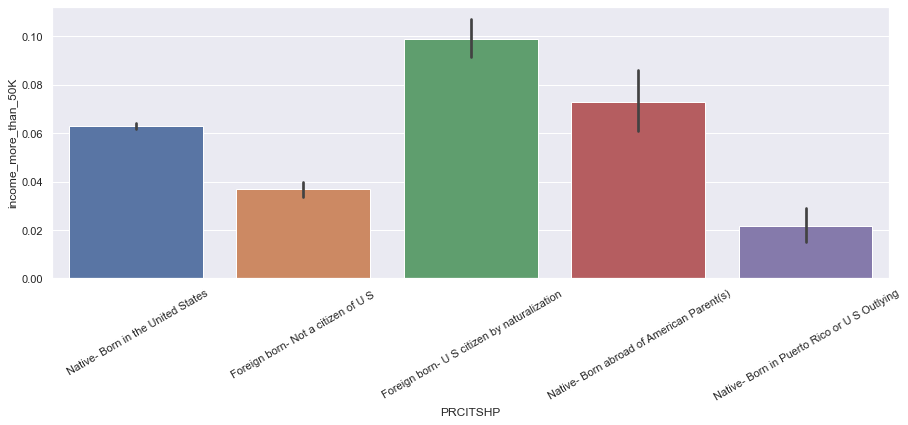

In [34]:
#citizenship impact on income level
sns.barplot(data=income_learn_df[['income_more_than_50K','PRCITSHP']], x="PRCITSHP", y="income_more_than_50K")
plt.xticks(rotation=30)
plt.show()

People who has "Foreign born- U S citizen by naturalization" increases chance to earn more than 50K.